# Housing Dataset Regression - Analysis, Models and Explanation

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="whitegrid")
from scipy import stats
import numpy as np
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [2]:
%matplotlib inline

In [3]:
housing_df = pd.read_csv('housing_dataset.csv')

In [4]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [6]:
filtered_columns = [col for col in housing_df.columns if col.lower() not in ['id']]

In [7]:
housing_filtered = housing_df[filtered_columns]

<AxesSubplot:>

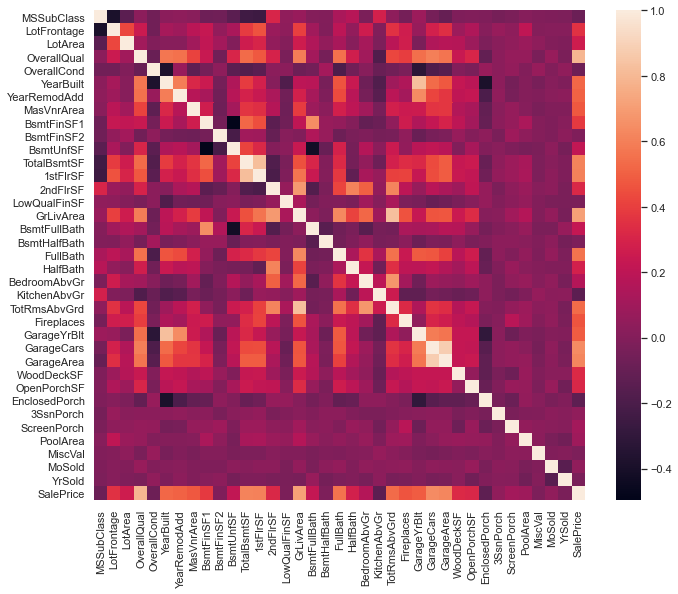

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(housing_filtered.corr())

## Correlation with target

In [9]:
correlation_data = housing_filtered.corr()

<AxesSubplot:>

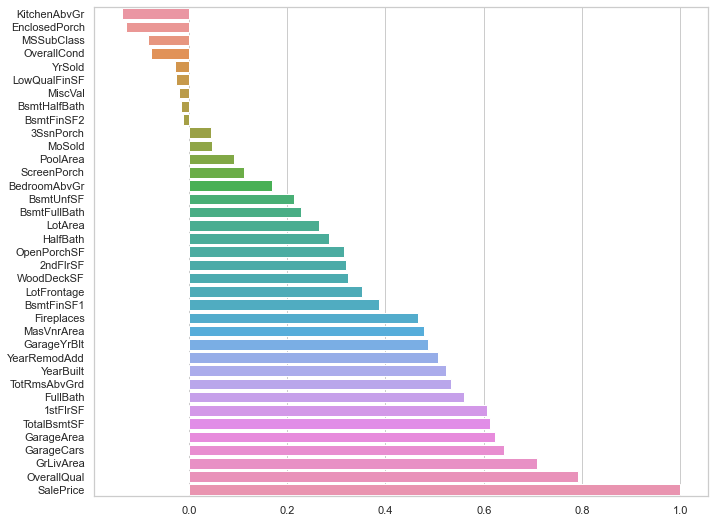

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
sorted_corr = correlation_data['SalePrice'].sort_values()
sns.barplot(x=sorted_corr.values, y=sorted_corr.index.values)

In [11]:
housing_filtered.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing value counts by columns

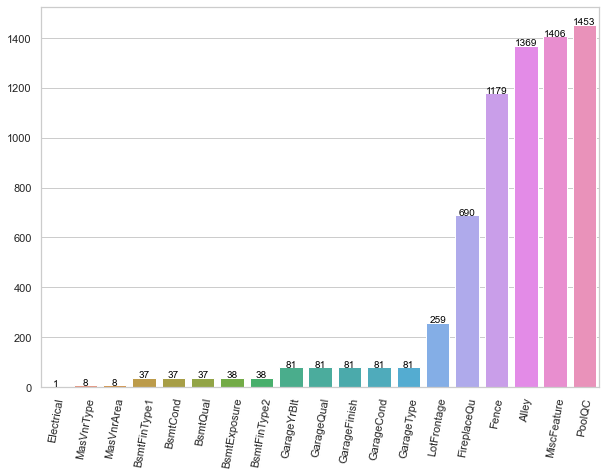

In [12]:
f, ax = plt.subplots(figsize=(10, 7))
missing_vals = housing_filtered.isnull().sum().sort_values()
missing_vals_reduced = missing_vals[missing_vals != 0]
p = sns.barplot(y = missing_vals_reduced.values, x=missing_vals_reduced.index.values, orient='v')
t = p.set_xticklabels(labels=missing_vals_reduced.index.values, rotation=80)
for index, item in enumerate(missing_vals_reduced.items()):
    p.text(index,item[1], item[1], color='black', ha="center")

In [13]:
cutoff = 0.4
columnswith_many_missing_values = missing_vals_reduced[missing_vals_reduced>cutoff*len(housing_df)].index.values
print (f"{columnswith_many_missing_values} have missing values for more {cutoff*100}% of the dataset")

['FireplaceQu' 'Fence' 'Alley' 'MiscFeature' 'PoolQC'] have missing values for more 40.0% of the dataset


## Sale Price Distribtion

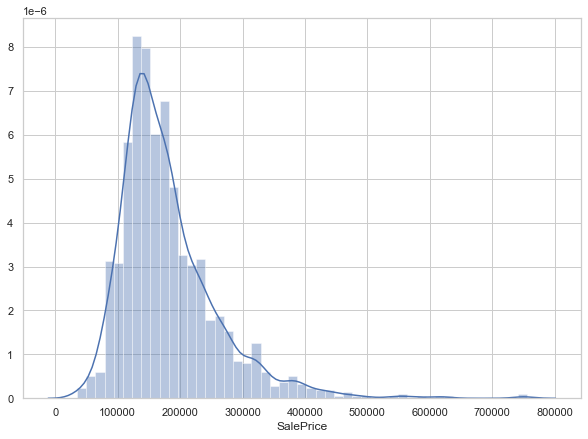

In [14]:
f, ax = plt.subplots(figsize=(10, 7))
g = sns.distplot(housing_df['SalePrice'])
# g.set_xticklabels(labels=[item.get_text() for item in g.xaxis.get_ticklabels()], rotation=45)

In [15]:
housing_df['SalePrice'].skew(), housing_df['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

# Categorical Features and Sale Price Relationship

Fetch all the columns which has unique values of less than 5% of the total data

In [16]:
categorical_features = [col for col in housing_filtered.columns if len(housing_df[col].unique()) < .05*len(housing_df)]

In [17]:
print(", ".join(categorical_features))

MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageQual, GarageCond, PavedDrive, 3SsnPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition


In [18]:
categorical_cols_with_text_type = housing_filtered.dtypes[housing_filtered.dtypes == 'object'].index.values

In [19]:
len(categorical_cols_with_text_type)

43

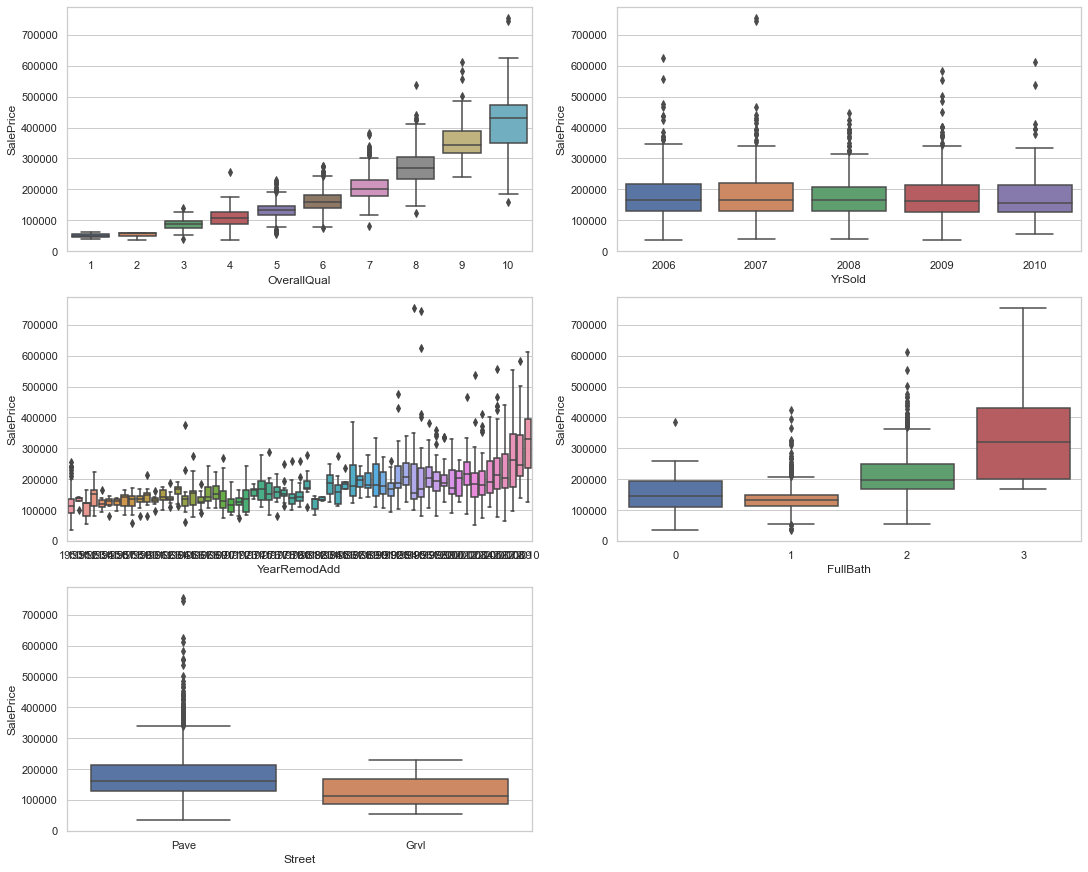

In [20]:
box_cat_cmp_fig = plt.figure(constrained_layout=True, figsize=(15,12))
grid = box_cat_cmp_fig.add_gridspec(3, 2, hspace=0.2, wspace=0.2)
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[0, 0]))
ax = sns.boxplot(x="YrSold", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[0, 1]))
ax = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[1, 0]))
ax = sns.boxplot(x="FullBath", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[1, 1]))
ax = sns.boxplot(x="Street", y="SalePrice", data=housing_filtered, ax=plt.subplot(grid[2, 0]))

## Pariwise plot for highly correlated data (The below reflects only for numerical)

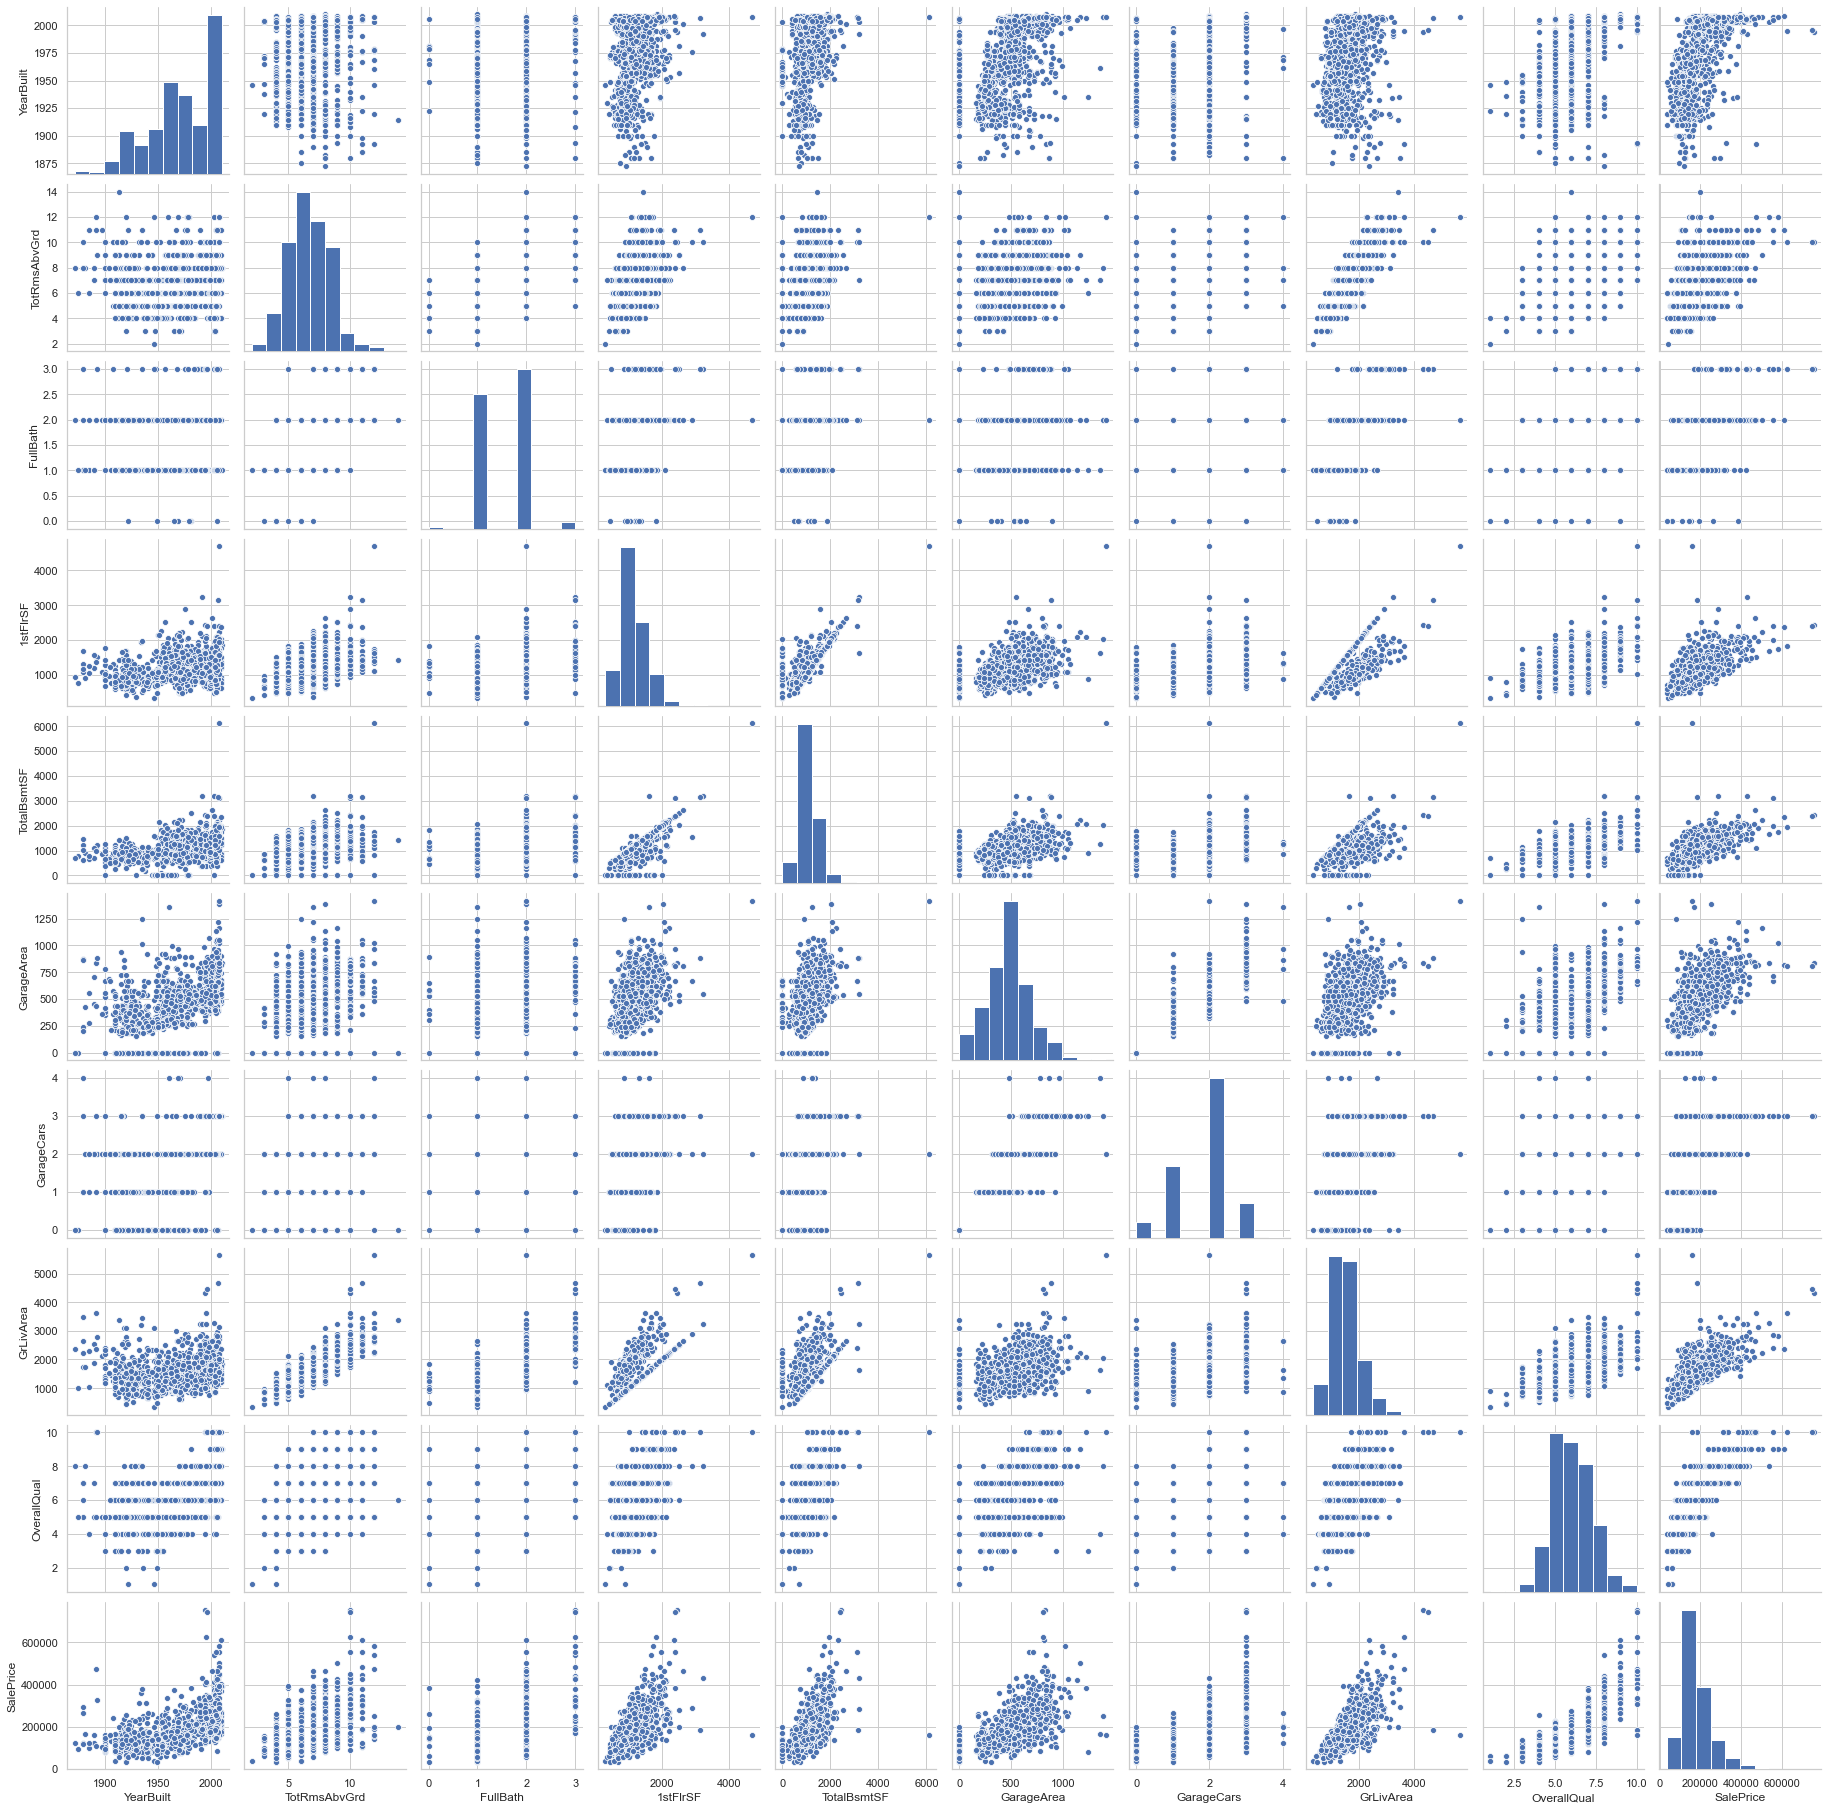

In [21]:
sns.pairplot(housing_filtered[sorted_corr.index.values[-10:]],height = 2.5)

## Further Sales Price analysis

<AxesSubplot:xlabel='SalePrice'>

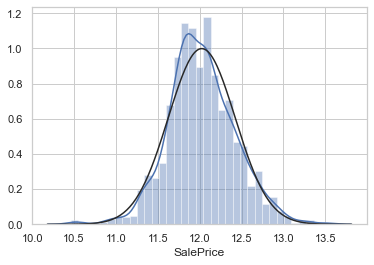

In [22]:
sns.distplot(np.log(housing_filtered['SalePrice']), fit=stats.norm)

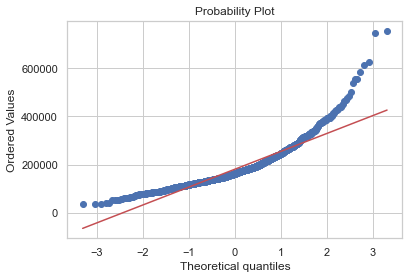

In [23]:
res = stats.probplot(housing_filtered['SalePrice'], plot=plt)

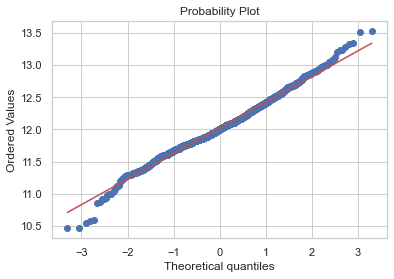

In [24]:
res_log = stats.probplot(np.log(housing_filtered['SalePrice']), plot=plt)

In [25]:
housing_filtered['log_sales'] = np.log(housing_filtered['SalePrice'])

# Linear Regression

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.pipeline import Pipeline

In [267]:
le = defaultdict(LabelEncoder)

In [268]:
filter_colums = columnswith_many_missing_values.tolist()
low_correlation_cols = [items[0] for items in sorted_corr.items() if (items[1] < 0.4 and items[1] > -0.3)]
filter_colums += ['SalePrice', 'TotalBsmtSF']
filter_colums += low_correlation_cols

In [269]:
columnswith_many_missing_values

array(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'],
      dtype=object)

In [270]:
housing_filtered_2 = housing_filtered[[col for col in housing_filtered.columns if col not in filter_colums ]]

In [271]:
housing_filtered_2 = housing_filtered_2.dropna()

In [272]:
housing_encoded = housing_filtered_2.apply(lambda x: le[x.name].fit_transform(x) if x.name in categorical_features else x)

In [273]:
len(housing_encoded)

1338

In [274]:
housing_encoded.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,log_sales
0,3,1,3,3,0,4,0,5,2,2,...,2003.0,1,1,548,4,4,2,8,4,12.247694
1,3,1,3,3,0,2,0,24,1,2,...,1976.0,1,1,460,4,4,2,8,4,12.109011
2,3,1,0,3,0,4,0,5,2,2,...,2001.0,1,1,608,4,4,2,8,4,12.317167
3,3,1,0,3,0,0,0,6,2,2,...,1998.0,2,2,642,4,4,2,8,0,11.849398
4,3,1,0,3,0,2,0,15,2,2,...,2000.0,1,2,836,4,4,2,8,4,12.429216


In [275]:
feature_cols = [col for col in housing_encoded.columns if col != 'log_sales']
trainx, testx, trainy, testy = train_test_split(housing_encoded[feature_cols],housing_encoded['log_sales'], random_state=21)

In [276]:
lin_model = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LinearRegression())])

In [277]:
yscaler = StandardScaler()
yscaler = yscaler.fit(housing_encoded['log_sales'].values.reshape(len(housing_encoded),1))

In [278]:
lin_model = lin_model.fit(trainx, yscaler.transform(trainy.values.reshape(-1,1)))

In [279]:
np.sqrt(metrics.mean_squared_error(yscaler.transform(testy.values.reshape(-1,1)), lin_model.predict(testx)))

0.4084997448930416

In [280]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(lin_model.predict(testx))) )}")

Log mean squared error : 11.252743844064637


In [281]:
metrics.explained_variance_score(y_true=testy, y_pred=lin_model.predict(testx))

-1.274986357758468

In [293]:
features_importance_lm_weights = [housing_encoded.columns[i]  for i in np.argsort(lin_model.steps[1][1].coef_[0])]
features_weights = [i  for i in np.sort(lin_model.steps[1][1].coef_[0])]

<AxesSubplot:>

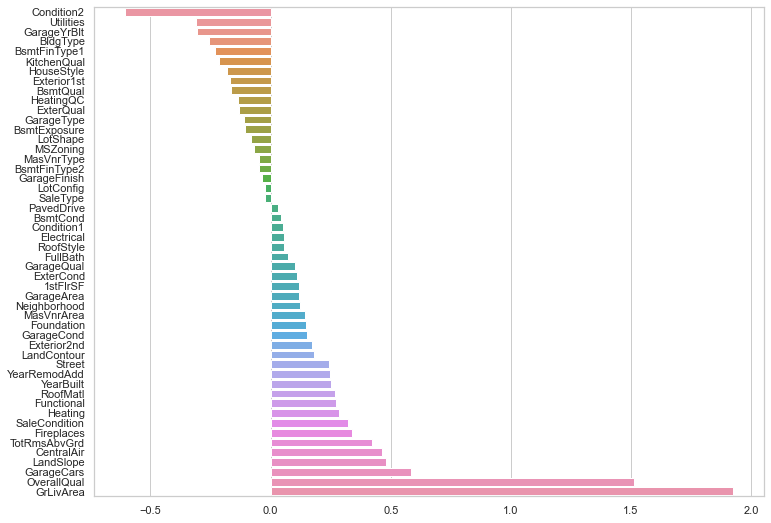

In [294]:
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x=features_weights, y=features_importance_lm_weights, orient='h')

## Using Stasmodels Package for OLS

In [295]:
import statsmodels.api as sm

In [296]:
mscaler = StandardScaler()
scaled_trainx = mscaler.fit_transform(trainx)


In [297]:
scaled_trainy = yscaler.transform(trainy.values.reshape(-1,1))

In [298]:
scaled_trainx = pd.DataFrame(data=scaled_trainx, columns=trainx.columns)

In [299]:
stat_linmod = sm.OLS(scaled_trainy,scaled_trainx)

In [300]:
stat_linmod = stat_linmod.fit()

In [301]:
stat_linmod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.853    
Dependent Variable:     y                AIC:                         910.3070 
Date:                   2020-10-17 23:27 BIC:                         1155.8445
No. Observations:       1003             Log-Likelihood:              -405.15  
Df Model:               50               F-statistic:                 117.2    
Df Residuals:           953              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.860            Scale:                       0.13823  
----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
MSZoning            -0.0105      0.0136    -0.7701    0.4414    -0.0373     0.0163
Street               0.0133      0.0129     1.0300    0.3033    -0.0120     0.0385
LotShape            -0.0390      0.0130    -2.9940    0.0028    -0.0646    -0.0134
LandContour          0.0381      0.0138     2.7605    0.0059     0.0110     0.0652
Utilities           -0.0098      0.0122    -0.8036    0.4218    -0.0338     0.0141
LotConfig           -0.0099      0.0124    -0.7988    0.4246    -0.0343     0.0144
LandSlope            0.0653      0.0142     4.6033    0.0000     0.0375     0.0932
Neighborhood         0.0310      0.0132     2.3370    0.0196     0.0050     0.0569
Condition1           0.0052      0.0125     0.4136    0.6792    -0.0193     0.0297
Condition2          -0.0259      0.0123    -2.1128    0.0349    -0.0500    -0.0018
BldgType            -0.0803      0.0137    -5.8544    0.0000    -0.1072    -0.0534
HouseStyle          -0.0492      0.0159    -3.0875    0.0021    -0.0805    -0.0179
OverallQual          0.2801      0.0224    12.5089    0.0000     0.2362     0.3241
YearBuilt            0.0566      0.0319     1.7740    0.0764    -0.0060     0.1191
YearRemodAdd         0.0834      0.0186     4.4775    0.0000     0.0468     0.1199
RoofStyle            0.0095      0.0131     0.7257    0.4682    -0.0162     0.0351
RoofMatl             0.0220      0.0125     1.7598    0.0788    -0.0025     0.0466
Exterior1st         -0.0399      0.0247    -1.6201    0.1055    -0.0883     0.0084
Exterior2nd          0.0395      0.0246     1.6073    0.1083    -0.0087     0.0878
MasVnrType          -0.0104      0.0138    -0.7497    0.4536    -0.0375     0.0168
MasVnrArea           0.0188      0.0158     1.1945    0.2326    -0.0121     0.0498
ExterQual           -0.0305      0.0194    -1.5755    0.1155    -0.0686     0.0075
ExterCond            0.0145      0.0128     1.1327    0.2576    -0.0106     0.0396
Foundation           0.0245      0.0190     1.2862    0.1987    -0.0129     0.0618
BsmtQual            -0.0464      0.0174    -2.6629    0.0079    -0.0806    -0.0122
BsmtCond             0.0090      0.0125     0.7179    0.4730    -0.0156     0.0336
BsmtExposure        -0.0413      0.0140    -2.9489    0.0033    -0.0688    -0.0138
BsmtFinType1        -0.0841      0.0134    -6.2803    0.0000    -0.1104    -0.0578
BsmtFinType2        -0.0093      0.0125    -0.7447    0.4566    -0.0337     0.0152
Heating              0.0170      0.0135     1.2569    0.2091    -0.0095     0.0436
HeatingQC           -0.0598      0.0152    -3.9335    0.0001    -0.0897    -0.0300
CentralAir           0.0911      0.0145     6.2775    0.0000     0.0626     0.1195
Electrical           0.0134      0.0132     1.0173    0.3093    -0.0125     0.0393
1stFlrSF             0.0105      0.0202     0.5195    0.6036    -0.0292     0.0502
GrLivArea            0.1948      0.0298     6.5432    0.0000     0.1364     0.2533
FullBath             0.0126      0.0189     0.6659    0.5056    -0.0245     0.0496
KitchenQual       

Text(0.5, 1.0, 'Scikit based Training')

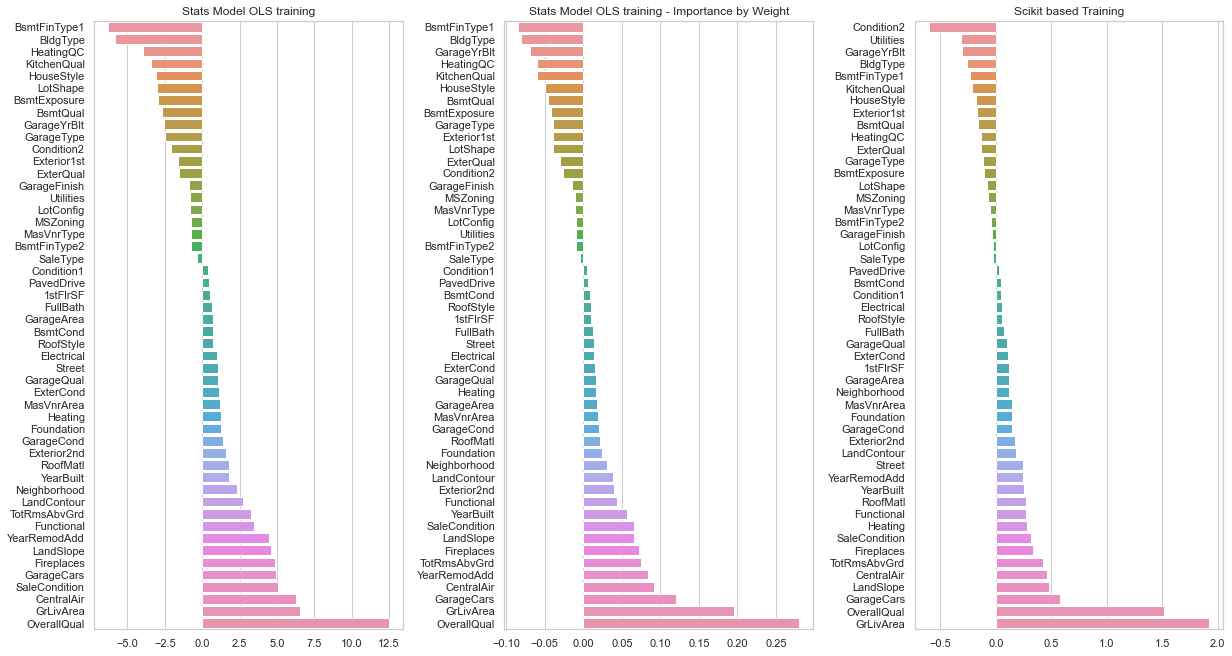

In [314]:

stas_model_vs_scikit_linreg = plt.figure(constrained_layout=True, figsize=(17,9))
grid = stas_model_vs_scikit_linreg.add_gridspec(1, 3, hspace=0.2, wspace=0.2)
ax = sns.barplot(x=stat_linmod.tvalues.sort_values().values, y=stat_linmod.tvalues.sort_values().index.values, orient='h', ax=plt.subplot(grid[0, 0]))
ax.set_title("Stats Model OLS training")

ax = sns.barplot(x=stat_linmod.params.sort_values().values, y=stat_linmod.params.sort_values().index.values, orient='h', ax=plt.subplot(grid[0, 1]))
ax.set_title("Stats Model OLS training - Importance by Weight")

ax2 = sns.barplot(x=features_weights, y=features_importance_lm_weights, orient='h', ax=plt.subplot(grid[0, 2]))
ax2.set_title("Scikit based Training")


In [303]:
residuals = stat_linmod.resid
fittedvalues = stat_linmod.fittedvalues

In [304]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [305]:
smoothed = lowess(residuals, fittedvalues)

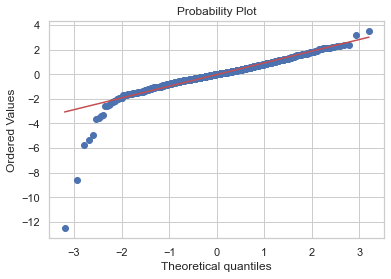

In [306]:
qqp = stats.probplot(stat_linmod.get_influence().resid_studentized_internal, plot=plt)

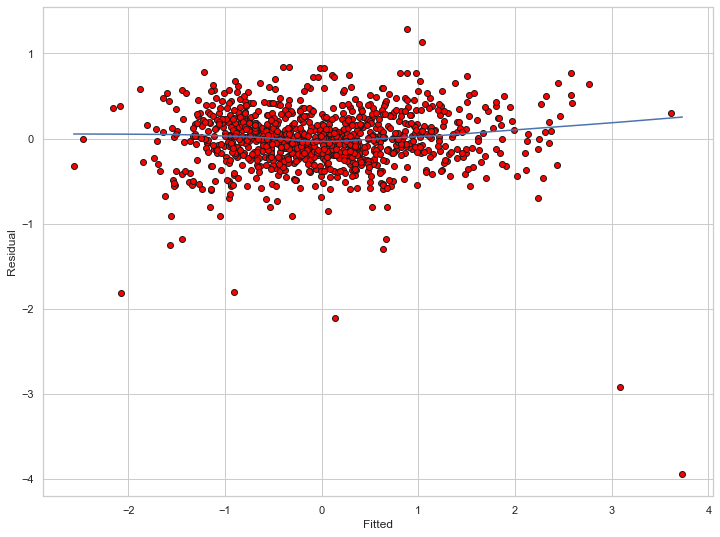

In [307]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(fittedvalues, residuals, edgecolors = 'k', facecolors = 'red')
ax.set_xlabel("Fitted")
ax.set_ylabel("Residual")
ax.plot(smoothed[:,0], smoothed[:,1])

In [308]:
stat_linmod.conf_int().head()

,0,1
MSZoning,-0.037298,0.016275
Street,-0.011997,0.038500
LotShape,-0.064605,-0.013446
LandContour,0.011020,0.065217
Utilities,-0.033773,0.014150


In [309]:
stat_linmod.params.head()

MSZoning      -0.010511
Street         0.013251
LotShape      -0.039025
LandContour    0.038119
Utilities     -0.009812
dtype: float64

In [310]:
print(stat_linmod.conf_int()[0]['MSZoning'], stat_linmod.conf_int()[1]['MSZoning'])

-0.03729772101740561 0.01627498910677598


### Dot Whisker Plot

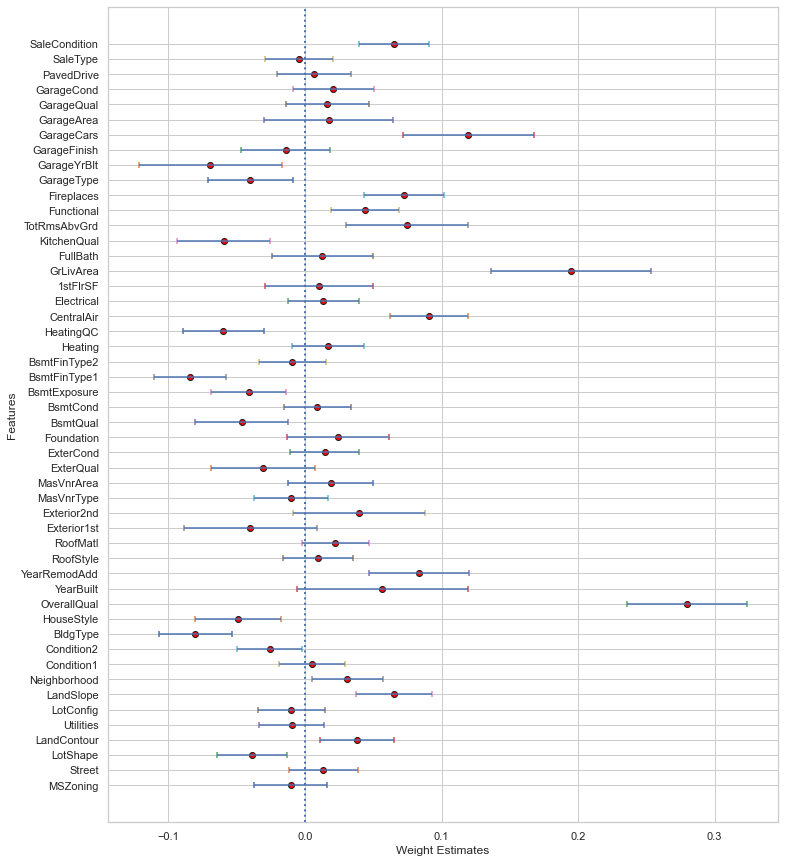

In [311]:
fig, ax = plt.subplots(figsize=(12, 15))
xvals = np.arange(-0.1, 0.3, 0.05)
ax.scatter(stat_linmod.params.values, stat_linmod.params.index.values, edgecolors = 'k', facecolors = 'red')
ax.set_xlabel("Weight Estimates")
ax.set_ylabel("Features")
ax.axvline(linewidth=2, color='b',linestyle=':')
for y in stat_linmod.params.index.values:
    ax.hlines(y=y,xmin=stat_linmod.conf_int()[0][y], xmax=stat_linmod.conf_int()[1][y])
    ax.scatter([stat_linmod.conf_int()[0][y], stat_linmod.conf_int()[1][y]],[y,y], marker="|")


## Feature Effects

In [324]:
effects = scaled_trainx*stat_linmod.params.values.reshape(1,-1)

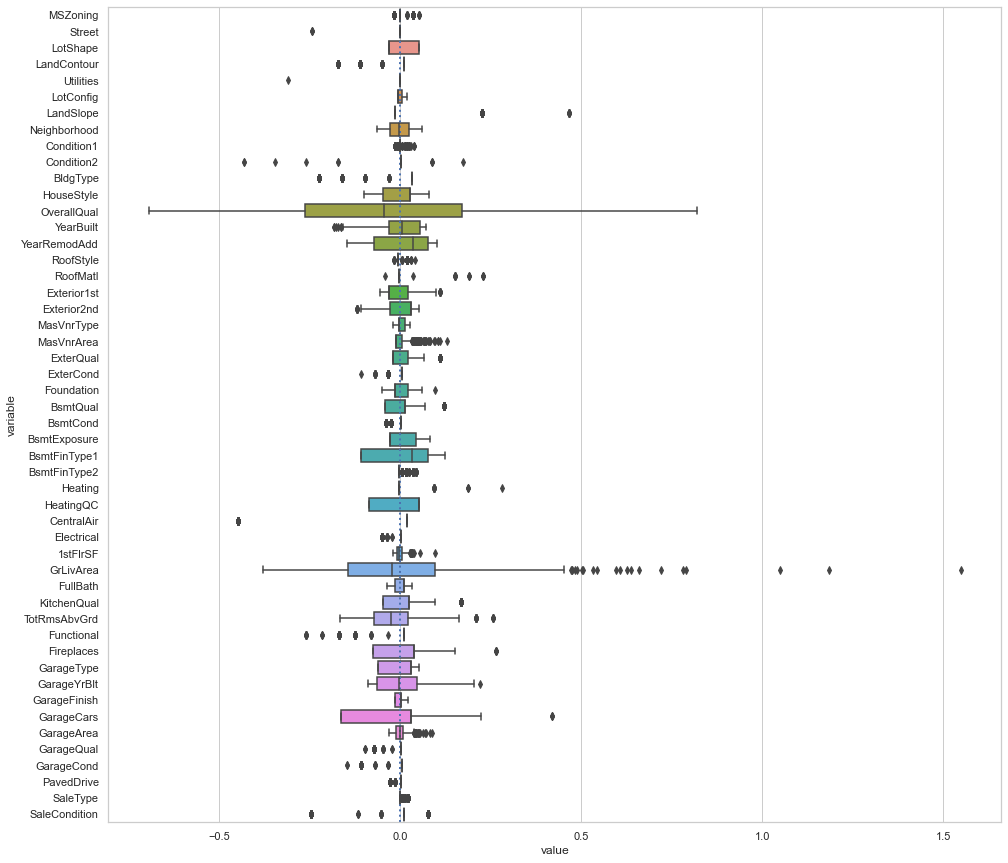

In [335]:
fig, ax = plt.subplots(figsize=(16, 15))
ax.axvline(linewidth=2, color='b',linestyle=':')
ax = sns.boxplot(x="value", y="variable",  data=pd.melt(effects), ax=ax)

## With Cross Validation

In [53]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [54]:
cv = ShuffleSplit(n_splits=10, random_state=21)

In [56]:
# trainx.values[train].shape

In [57]:
error = 0
for i, (train, test) in enumerate(cv.split(trainx.values)):
    lin_model_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LinearRegression())])
    lin_model_cv.fit(trainx.values[train], trainy.values[train])
    error += np.sqrt( metrics.mean_squared_log_error(np.exp(trainy.values[test]), np.exp(lin_model_cv.predict(trainx.values[test]))) )
print (f"Average error is : {error/10}")

Average error is : 0.1416530200195592


In [58]:
from sklearn.linear_model import RidgeCV, LassoCV

In [59]:
ridge_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', RidgeCV(cv=10, alphas=[0,1,10,15,500,1000,10000]))])

In [60]:
ridge_cv = ridge_cv.fit(trainx, trainy )

In [61]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(ridge_cv.predict(testx))) )}")

Log mean squared error : 0.1560265394174065


In [62]:
# grid_ridge_cv = Pipeline([('scale', MinMaxScaler()), 
#                       ('model', RidgeCV(cv=10))])
# parameters={"model__alphas":[[0,1,10,15,500,1000,10000]]}
# grid_ridge_model = GridSearchCV(grid_ridge_cv, parameters)

In [63]:
# grid_ridge_model = grid_ridge_model.fit(trainx,trainy)

In [64]:
lasso_cv = Pipeline([('scale', MinMaxScaler()), 
                      ('model', LassoCV(cv=10))])

In [65]:
lasso_cv = lasso_cv.fit(trainx, trainy )

In [66]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(lasso_cv.predict(testx))) )}")

Log mean squared error : 0.16110278824262234


In [67]:
from sklearn.linear_model import SGDRegressor

In [68]:
sgd = Pipeline([('scale', StandardScaler()), 
                      ('model', SGDRegressor())])

In [69]:
parameters={"model__alpha":[0.0001, 0.001, 0.01, 0.1, 0,1,10,15,500,1000,10000], "model__penalty":['l2', 'l1', 'elasticnet']}

In [70]:
grid_sgd_model = GridSearchCV(sgd, parameters)

In [72]:
grid_sgd_model = grid_sgd_model.fit(trainx, trainy)

In [73]:
grid_sgd_model.best_params_

{'model__alpha': 0.01, 'model__penalty': 'elasticnet'}

In [74]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(grid_sgd_model.predict(testx))) )}")

Log mean squared error : 0.15697714504093882


## Boosted Tree

In [75]:
import lightgbm

In [76]:
train_data = lightgbm.Dataset(trainx, label=trainy, categorical_feature=[cat for cat in categorical_features if cat in housing_encoded.columns])
test_data = lightgbm.Dataset(testx, label=testy)

In [77]:
parameters = {
    'application': 'regression_l2',
    'objective': 'regression',
    'metric': 'regression_l2',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 1
}

In [78]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression
[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression


/Users/mayorao/opt/miniconda3/envs/stats/lib/python3.8/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/mayorao/opt/miniconda3/envs/stats/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities', 'YearRemodAdd']
  warnings.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 48
[LightGBM] [Warning] objective is set=regression, application=regression_l2 will be ignored. Current value: objective=regression
[LightGBM] [Info] Start training from score 12.059419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 0.158502
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 0.147798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 0.138572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 0

In [79]:
metrics.explained_variance_score(y_true=testy, y_pred=model.predict(testx))

0.8671038162745888

In [80]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(model.predict(testx))) )}")

Log mean squared error : 0.14945773552860264


In [81]:
import xgboost as xgb

In [82]:
xgb_model = xgb.XGBRegressor()

In [83]:
xgb_model.fit(trainx, trainy)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred = xgb_model.predict(testx)

In [85]:
metrics.explained_variance_score(y_true=testy, y_pred=xgb_model.predict(testx))

0.8585947794251683

In [86]:
print (f"Log mean squared error : {np.sqrt( metrics.mean_squared_log_error(np.exp(testy), np.exp(xgb_model.predict(testx))) )}")

Log mean squared error : 0.15413303801389058


## Use Optuna to tune XG-Boost

In [87]:
#ToDo